In [3]:
import mysql.connector#importing the mysql connector
#importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
#importing the database from mysaql
cn=mysql.connector.connect(
    host="localhost",
    port=3306,
    user="root",
    password="Dsupm8801c@07",
    database="studentdb")
df=pd.read_sql_query("select * from student_marks",cn)#making a DataFrame

df


,Name,Gender,DOB,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
0,John,M,05-04-1988,55,45,56,87,21,52,89,65
1,Suresh,M,04-05-1987,75,96,78,64,90,61,58,2
2,Ramesh,M,25-05-1989,25,54,89,76,95,87,56,74
3,Jessica,F,12-08-1990,78,96,86,63,54,89,75,45
4,Jennifer,F,02-09-1989,58,96,78,46,96,77,83,53
5,Annu,F,05-04-1988,45,87,52,89,55,89,87,52
6,pooja,F,04-05-1987,55,64,61,58,75,58,64,61
7,Ritesh,M,25-05-1989,54,76,87,56,25,56,76,87
8,Farha,F,12-08-1990,55,63,89,75,78,75,63,89
9,Mukesh,M,02-09-1989,96,46,77,83,58,83,46,77


In [6]:
#shape of the DataFrame
df.shape

(10, 11)

In [7]:
#with below comnads we got the info that dtype of each attribute,it will count how much no null value is there in each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       10 non-null     object
 1   Gender     10 non-null     object
 2   DOB        10 non-null     object
 3   Maths      10 non-null     int64 
 4   Physics    10 non-null     int64 
 5   Chemistry  10 non-null     int64 
 6   English    10 non-null     int64 
 7   Biology    10 non-null     int64 
 8   Economics  10 non-null     int64 
 9   History    10 non-null     int64 
 10  Civics     10 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1008.0+ bytes


In [8]:
#lets check the describe of thr data
df.describe()

,Maths,Physics,Chemistry,English,Biology,Economics,History,Civics
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000
mean,59.600000,72.300000,75.300000,69.700000,64.700000,72.700000,69.700000,60.5000
std,19.460501,20.661559,14.000397,14.453373,26.998148,14.629119,14.453373,25.3432
min,25.000000,45.000000,52.000000,46.000000,21.000000,52.000000,46.000000,2.0000
25%,54.250000,56.250000,65.000000,59.250000,54.250000,58.750000,59.250000,52.2500
50%,55.000000,70.000000,78.000000,69.500000,66.500000,76.000000,69.500000,63.0000
75%,70.750000,93.750000,86.750000,81.250000,87.000000,86.000000,81.250000,76.2500
max,96.000000,96.000000,89.000000,89.000000,96.000000,89.000000,89.000000,89.0000


key observation

1 The mean is less than median(50th percentile) in all columns( no_skweed data)


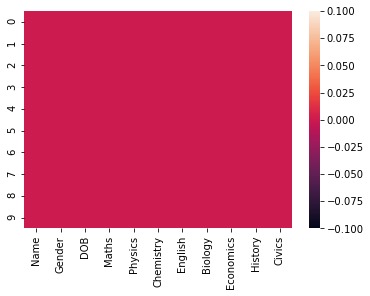

In [33]:
#now check the null value with heatmap
sns.heatmap(df.isnull())

Data set has no missing value
 If there were any ,you would've noticed in figure represented by different colour shade

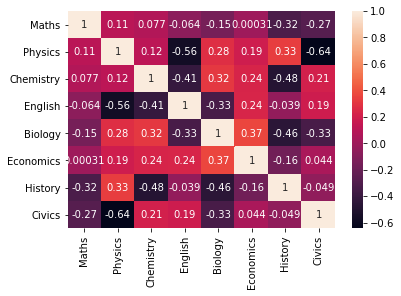

In [11]:
#now check the correlation of dataset
dfcor=df.corr()
sns.heatmap(dfcor,annot=True)

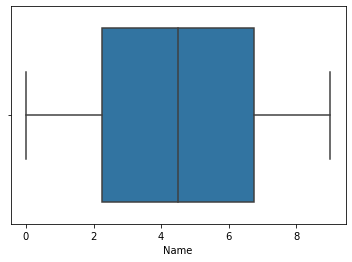

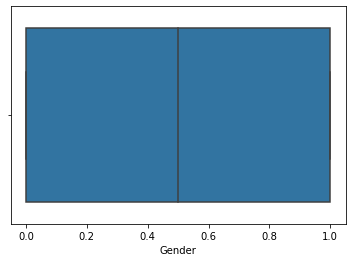

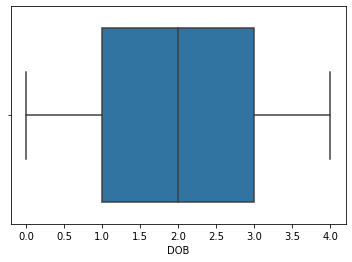

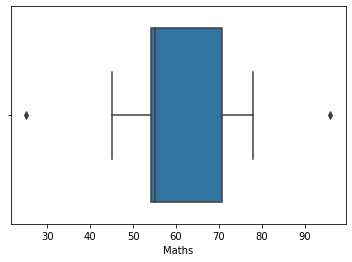

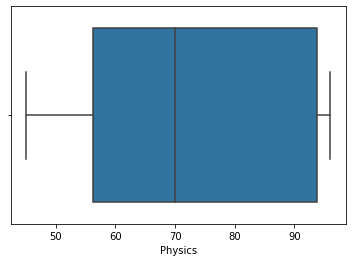

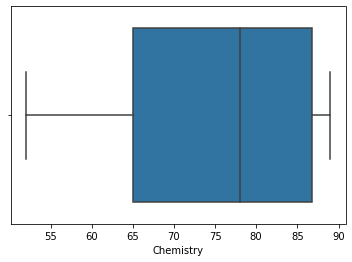

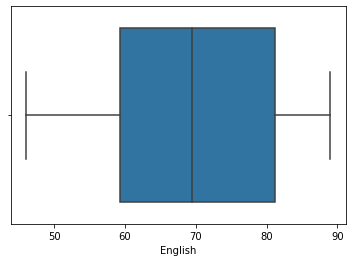

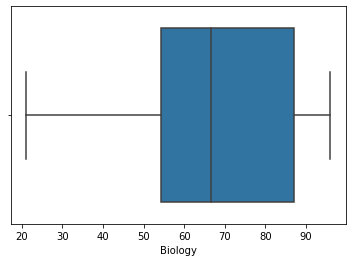

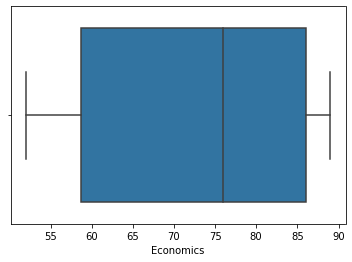

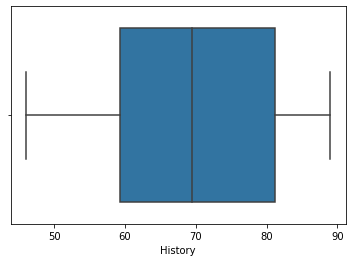

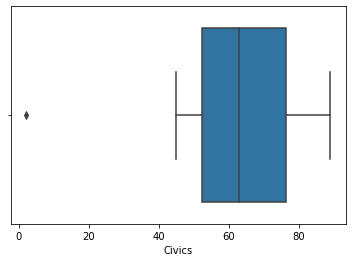

In [34]:
#now check the outliers using the boxplot
cl=df.columns
for i in cl:
    if df[i].dtype!="object":
        sns.boxplot(df[i])
        plt.show()

Observation:-
    After seen the above plot we can say in Civics and maths some outliers are there

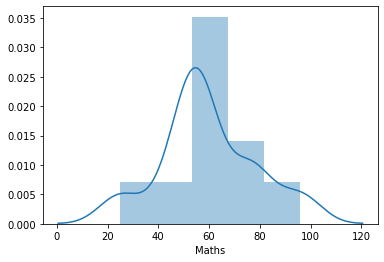

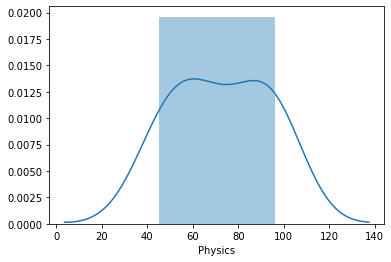

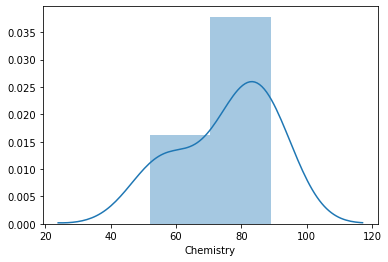

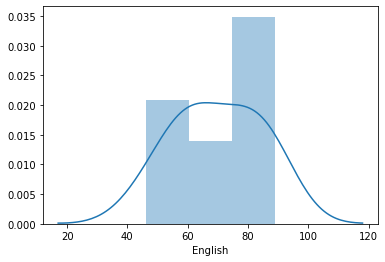

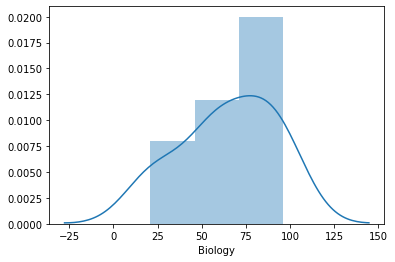

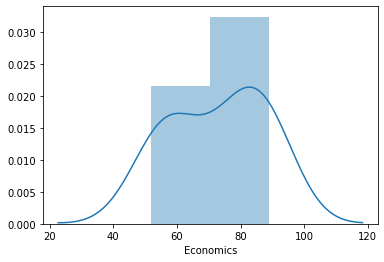

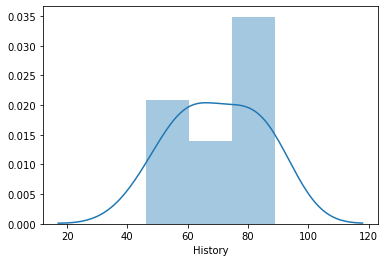

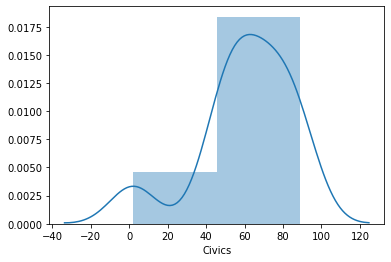

In [17]:
for i in cl:
    if df[i].dtype!="object":
        sns.distplot(df[i])
        plt.show()

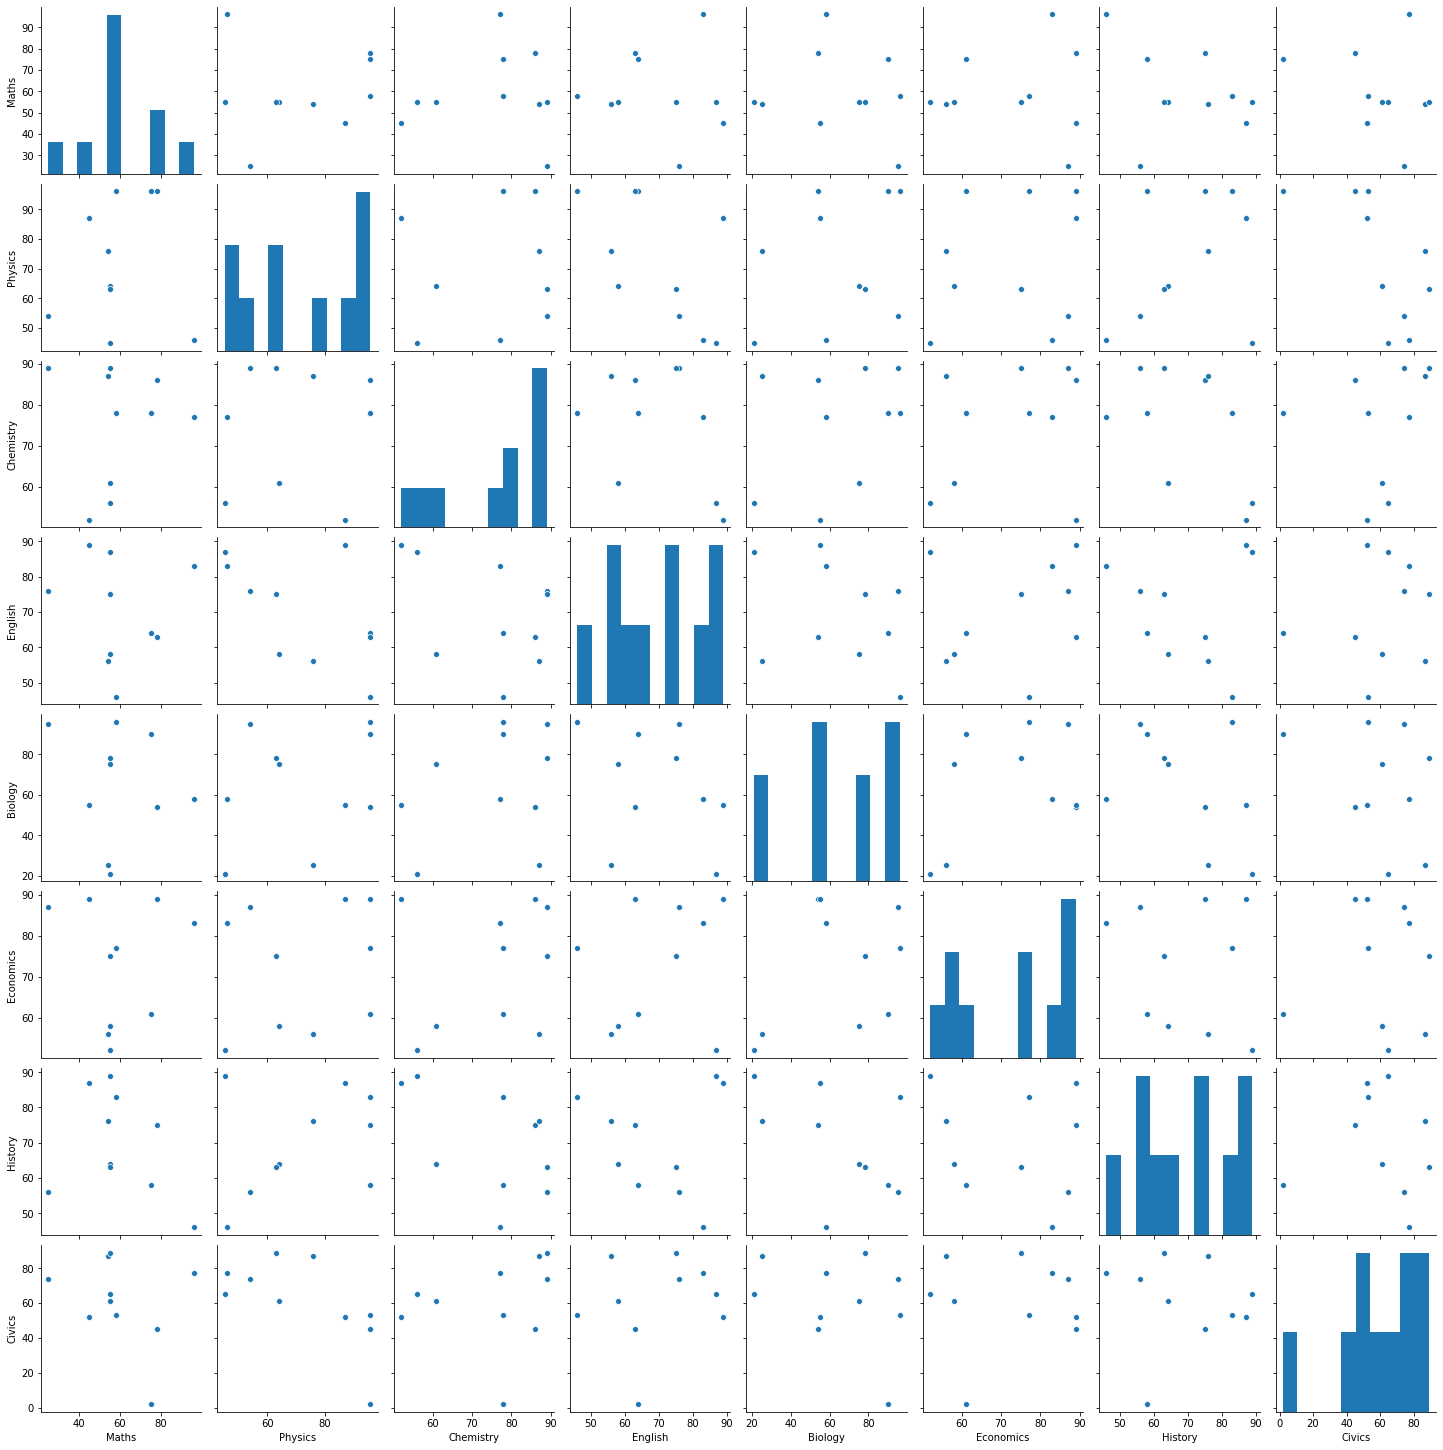

In [19]:
sns.pairplot(df)

In [29]:
#lets preprocessing the data for getting the zscore if dataset
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cl=df.columns
for i in cl:
    if df[i].dtype=="object":
        df[i]=le.fit_transform(df[i])
        
df.dtypes

Name         int32
Gender       int32
DOB          int32
Maths        int64
Physics      int64
Chemistry    int64
English      int64
Biology      int64
Economics    int64
History      int64
Civics       int64
dtype: object

In [38]:
from scipy.stats import zscore#importing the zscore
z=np.abs(zscore(df))#getting the zscore
print(np.where(z>3))#detecting the outlier

(array([], dtype=int64), array([], dtype=int64))


# conclusion
Here we saw that there is no  zscore value are more than the SD 3 so no need to do the new dataset
we are staying with the same dataset